In [17]:
import numpy as np
import pandas as pd
#RAIN_TYPE = 'Wheat'
#GRAIN_TYPE = 'newWheatData'
GRAIN_TYPE = 'WheatAdded_Type'
#GRAIN_TYPE = 'Combined_Grains'
# GRAIN_TYPE = 'Oats'
# GRAIN_TYPE = 'Barley'
# GRAIN_TYPE = 'Sorghum'
# GRAIN_TYPE = 'Soybeans'
# GRAIN_TYPE = 'Corn'

In [18]:
URL = "../../Datasets/processed/" + GRAIN_TYPE + ".csv"

# Load the dataset
df = pd.read_csv(URL)
# Let's say 'df' is your original DataFrame
# Filter out the samples where 'd(cm)' is 7.7
df_77 = df[df['d(cm)'] == 7.7]

# Decide how many synthetic samples you want to create
# For example, if df_77 has 50 samples and you want to triple that amount in the dataset
num_synthetic_samples = round(len(df_77) * 1.2)  # to add twice as many

# Identify numeric columns to which you want to add noise
numeric_columns = df_77.select_dtypes(include=[np.number]).columns.tolist()

# Generate synthetic samples
synthetic_samples = df_77.sample(n=num_synthetic_samples, replace=True)

# Add some small random noise to the synthetic samples (excluding 'd(cm)' and 'Freq')
for column in numeric_columns:
    if column not in ['d(cm)', 'Freq']:  # Exclude 'd(cm)' and 'Freq' from noise addition
        std_dev = df_77[column].std()
        noise = np.random.normal(0, std_dev * 0.1, num_synthetic_samples)
        synthetic_samples[column] += noise

# Specifically handle the 'Freq' column to ensure it remains a whole number
if 'Freq' in synthetic_samples.columns:
    std_dev_freq = df_77['Freq'].std()
    noise_freq = np.random.normal(0, std_dev_freq * 0.1, num_synthetic_samples)
    synthetic_samples['Freq'] = (synthetic_samples['Freq'] + noise_freq).round().astype(int)

# Ensure 'Freq' does not go below a certain threshold, if applicable
# synthetic_samples['Freq'] = synthetic_samples['Freq'].clip(lower=minimum_valid_freq_value)

# Concatenate the synthetic samples back to the original dataset
df_augmented = pd.concat([df, synthetic_samples])

# Make sure to reset the index as concatenation can result in duplicate indices
df_augmented.reset_index(drop=True, inplace=True)

# Specify the path for your new file
output_file_path = '../../Datasets/processed/augmented_' + GRAIN_TYPE + '.csv'  # Update this to your desired file path

# Save the augmented DataFrame to a new CSV file
df_augmented.to_csv(output_file_path, index=False)



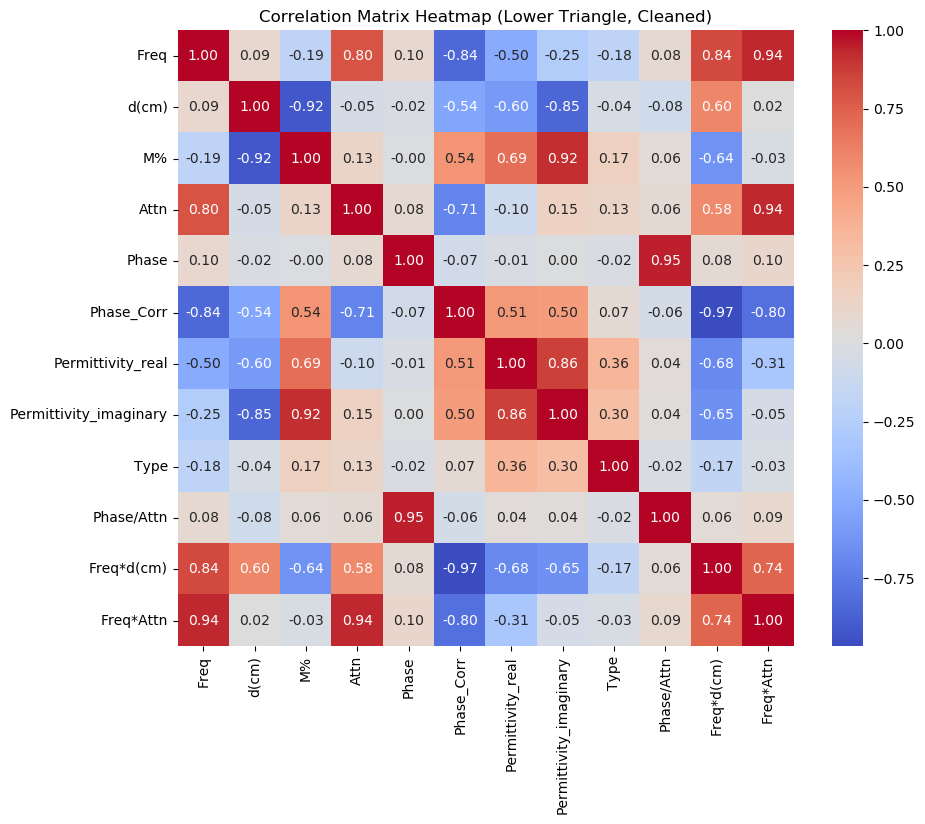

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate correlation matrix
df_cleaned = df.drop(columns=['Unnamed: 0', 'Density'], errors='ignore')

# Now let's recalculate the correlation matrix without these columns
corr_cleaned = df_cleaned.corr()

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_cleaned, dtype=bool))
mask = mask[1:, :-1]
corr = corr_cleaned.iloc[1:,:-1]
# Generate a heatmap for the cleaned correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_cleaned, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap (Lower Triangle, Cleaned)')
plt.show()

